<a href="https://colab.research.google.com/github/Andrian0s/ML4NLP1-2023-Tutorial-Notebooks/blob/main/tutorial_notebooks/intro_to_sklearn_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to scikit-learn

We would like to introduce you to scikit-learn with the help of an instructional example about text classification. We will cover the most basic principles and ideas about scikit-learn in this notebook. This tutorial is inspired by the sklearn tutorial on http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html, but contains a few more explanations and is suited to introduce scikit-learn in class.

$Author$: Phillip Ströbel

With adjustments from: Janis Goldzycher, Andrianos Michail


## Data

Get the data from http://qwone.com/~jason/20Newsgroups/. We will work with the 20news-bydate.tar.gz data set. Unzip it to a suitable destination. Here, all the data lies in the data folder. To our convenience, it has already been split into a training and a test set, so we don't have to care about this. What we need to do though is get the data and put it into a dataframe (you could also only work with dictionaries or other data containers). We do this for both the training and the test set.

In [ ]:
import os
import pandas as pd


def create_df(path_to_data, random_state=42):
    """
    Takes the path of a folder containing all the subfolders (which contain the actual documents).
    Builds a pandas datafram with document ids, the text and the label.
    :param path_to_data: path to top folder as a string
    :param random_state: integer, seed for shuffling
    :return: pandas dataframe with all th
    """
    doc_list = list()  # doc_list now: [[doc<str>, label<str>], ...]

    for category in os.listdir(path_to_data):
        for document in os.listdir(os.path.join(path_to_data, category)):
            doc = open(os.path.join(path_to_data, category, document), 'r', encoding='latin-1').read().replace('\n', ' ')
            doc_list.append([doc, category])

    df = pd.DataFrame(doc_list, columns=['text', 'label'])

    return df.sample(frac=1, random_state=random_state) # return and shuffle dataframe

In [ ]:
train = create_df('data/20news-bydate/20news-bydate-train')
test = create_df('data/20news-bydate/20news-bydate-test')

Several ways to inspect the data.

In [ ]:
print('training size: ', train.shape)
print('test size: ', test.shape)

training size:  (11314, 2)
test size:  (7532, 2)


In [ ]:
train.head()

,text,label
7492,From: prb@access.digex.com (Pat) Subject: Re: ...,sci.space
3546,From: jcj@tellabs.com (jcj) Subject: Re: Losin...,soc.religion.christian
5582,From: hacker@cco.caltech.edu (Jonathan Bruce H...,rec.autos
4793,From: harmons@.WV.TEK.COM (Harmon Sommer) Subj...,rec.motorcycles
3813,From: dppeak@matt.ksu.ksu.edu (David Paul Peak...,comp.sys.mac.hardware


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11314 entries, 7492 to 7270
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11314 non-null  object
 1   label   11314 non-null  object
dtypes: object(2)
memory usage: 265.2+ KB


In [ ]:
train.describe()

,text,label
count,11314,11314
unique,11314,20
top,"From: gt6511a@prism.gatech.EDU (COCHRANE,JAMES...",rec.sport.hockey
freq,1,600


In [ ]:
train.groupby('label').size()

label
alt.atheism                 480
comp.graphics               584
comp.os.ms-windows.misc     591
comp.sys.ibm.pc.hardware    590
comp.sys.mac.hardware       578
comp.windows.x              593
misc.forsale                585
rec.autos                   594
rec.motorcycles             598
rec.sport.baseball          597
rec.sport.hockey            600
sci.crypt                   595
sci.electronics             591
sci.med                     594
sci.space                   593
soc.religion.christian      599
talk.politics.guns          546
talk.politics.mideast       564
talk.politics.misc          465
talk.religion.misc          377
dtype: int64

As usual, we split the labels from the training and the test set.

In [ ]:
X_train = train.text
y_train = train.label
X_test = test.text
y_test = test.label

In [ ]:
type(X_train)

pandas.core.series.Series

Series is just a "One-dimensional ndarray with axis labels". Let's see if we got this right.

In [ ]:
print('Training set shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test set shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training set shape:  (11314,)
Training labels shape:  (11314,)
Test set shape:  (7532,)
Test labels shape:  (7532,)


In [ ]:
X_train.head()

7492    From: prb@access.digex.com (Pat) Subject: Re: ...
3546    From: jcj@tellabs.com (jcj) Subject: Re: Losin...
5582    From: hacker@cco.caltech.edu (Jonathan Bruce H...
4793    From: harmons@.WV.TEK.COM (Harmon Sommer) Subj...
3813    From: dppeak@matt.ksu.ksu.edu (David Paul Peak...
Name: text, dtype: object

## Preprocessing
So far, so good! But we know that machine learning algorithms cannot work with text data directly. So we need to vectorise the data somehow. also, we might do some preprocessing. Let's see how we can tackle these problems.
### Vectorise the data
Luckily, sklearn offers some nice classes which help us. We should tokenise the data and then vectorise it. Conveniently, sklearns `CountVectoriser()` does exactly that. Let's see how it works.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)  # num_docs x num_words

Basically, the three central methods in sklearn are `transform`, `fit`, `fit_transform`, and `predict`. We will see how each of these work and when to use them. We have alredy made use of `fit_transform`. Instead of using this method, we could have called the method `fit` on the training set first and the use `transform` to vectorise the data (to 'transform' it). With the fitted `CountVectorizer` we can now transform other data, like for example the test set.

In [ ]:
X_test_counts = count_vect.transform(X_test)

We will return to this later. First let us see what `CountVectorizer` produces.

In [ ]:
X_train_counts

<11314x130107 sparse matrix of type '<class 'numpy.int64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

The vectorised form contains 11314 rows, which is the number of our documents, while the number of columns tells us something about the vocabulary size of the whole corpus. But what's a sparse matrix? Note that saving the complete, sparse document-vocabulary matrix would need to hold 1,472,030,598 values, most of which would be zero? Why? Instead, we only save 1,787,565 values in a compressed sparse row format. An example:

In [ ]:
import numpy as np
from scipy import sparse

row = np.array([0, 0, 1, 2, 2, 2])
col = np.array([0, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3, 4, 5, 6])
mtx = sparse.csr_matrix((data, (row, col)), shape=(3, 3))
mtx

<3x3 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [ ]:
m = mtx.todense()
m

matrix([[1, 0, 2],
        [0, 0, 3],
        [4, 5, 6]])

In [ ]:
m[0,0]

1

In [ ]:
m[0,:]

matrix([[1, 0, 2]])

How does indexing and printing of sparse matrices work?

In [ ]:
print(mtx[:,0])

  (0, 0)	1
  (2, 0)	4


Now let's apply our new knowledge to our word-document matrix.

In [ ]:
X_train_counts.shape

(11314, 130107)

In [ ]:
X_train_counts[0,:]

<1x130107 sparse matrix of type '<class 'numpy.int64'>'
	with 60 stored elements in Compressed Sparse Row format>

We can see which positions of the document vector are occupied. A `1` means the word occurs once in the document, while any other number gives the exact count.

In [ ]:
print(X_train_counts[0,:])

  (0, 56979)	1
  (0, 95455)	1
  (0, 25605)	3
  (0, 47246)	2
  (0, 41105)	1
  (0, 92305)	2
  (0, 111322)	1
  (0, 99721)	1
  (0, 107159)	1
  (0, 91242)	1
  (0, 123292)	1
  (0, 35456)	1
  (0, 29987)	1
  (0, 90379)	1
  (0, 53521)	1
  (0, 89917)	1
  (0, 41316)	1
  (0, 119714)	1
  (0, 76032)	1
  (0, 2927)	1
  (0, 87620)	1
  (0, 95162)	1
  (0, 64095)	1
  (0, 86694)	1
  (0, 114808)	1
  :	:
  (0, 28601)	1
  (0, 59779)	1
  (0, 107705)	1
  (0, 27001)	1
  (0, 65798)	2
  (0, 68766)	2
  (0, 42876)	1
  (0, 113279)	2
  (0, 90252)	1
  (0, 18888)	1
  (0, 114520)	1
  (0, 28012)	1
  (0, 90282)	1
  (0, 128402)	1
  (0, 71079)	1
  (0, 86493)	2
  (0, 122107)	1
  (0, 113172)	1
  (0, 48546)	1
  (0, 73201)	2
  (0, 114646)	1
  (0, 66184)	1
  (0, 28615)	1
  (0, 56283)	1
  (0, 112031)	1


The number of words in a document is also trivial to get.

In [ ]:
X_train_counts[0,:].sum()

70

In a similar fashion, we can count how many times a certain word occurs in the training set.

In [ ]:
X_train_counts[:,0].sum()

1534

We can also learn more about the vocabulary, e.g., how many times a word occurs in the corpus. First, we need to find the index:

In [ ]:
count_vect.vocabulary_.get('sin')

107529

Now we have the index, we can count how many times the word "sin" occurs in our corpus.

In [ ]:
sin_index = count_vect.vocabulary_.get('sin')
X_train_counts[:,sin_index].sum()

284

So far, so good. `CountVectorizer` lets you also define if you want to count bigrams, or other n-grams. Moreover, you can not only count words, but als characters. We suggest you try these out for yourself. In the following, we will continue with unigrams.

Since we have numbers now instead of strings, we could start training models now. However, raw counts will not be very informative, since we also have to take the length of a dodument into account. Dividing each row by the total number of words will give us the term frequency for each document. That will be much better! Now we still might have higher values for words which occur often in many documents. typically, these words are less informative, so we need to downscale those weights. This will modify or counts so that we are left with what is called the "term frequency-inverse document frequency" measure, or tf-idf. The tf-idf measure is given by
\begin{equation}
f_{t,d}\cdot log \frac{N}{n_t}
\end{equation}
In sklearn, there is the `TfidfTransformer` which does exactly that for us :-).

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_tranformer = TfidfTransformer(smooth_idf=True).fit(X_train_counts)
X_train_tfidf = tfidf_tranformer.transform(X_train_counts)

In [ ]:
X_train_tfidf.shape

(11314, 130107)

In [ ]:
X_train_tfidf[0,:]

<1x130107 sparse matrix of type '<class 'numpy.float64'>'
	with 60 stored elements in Compressed Sparse Row format>

In [ ]:
print(X_train_tfidf[0,:])

  (0, 128402)	0.040784535077023294
  (0, 123292)	0.050047475590731784
  (0, 122107)	0.23608192298840142
  (0, 119714)	0.07875000724650627
  (0, 118561)	0.08954168153621775
  (0, 114808)	0.09573115745960263
  (0, 114646)	0.050777861981411015
  (0, 114520)	0.06830757439166886
  (0, 114455)	0.02820701338545796
  (0, 114440)	0.03549606475525584
  (0, 113279)	0.16387685991792555
  (0, 113172)	0.22131647570679347
  (0, 112031)	0.08351647703105329
  (0, 111322)	0.02638497269006967
  (0, 111152)	0.19361694762246492
  (0, 107705)	0.11802257739846389
  (0, 107159)	0.15195563761417366
  (0, 99721)	0.036210478864209125
  (0, 97123)	0.09222812737895975
  (0, 95455)	0.15737149958892138
  (0, 95162)	0.04747820199185726
  (0, 92305)	0.2695561571516042
  (0, 91242)	0.18880639832564547
  (0, 90379)	0.0274484609010517
  (0, 90282)	0.1911021911312422
  :	:
  (0, 65798)	0.08764480627432894
  (0, 64095)	0.048786024742777
  (0, 59779)	0.06825052577984377
  (0, 56979)	0.02638497269006967
  (0, 56283)	0.034656

Again we apply the transformation to the test set:

In [ ]:
X_test_tfidf = tfidf_tranformer.transform(X_test_counts)

This should suffice as features to train a classifer (for the moment).

### Vectorise labels
Next, we deal with the labels. Every document has exactly one label attached. We have 20 labels in total. This means we can basically assign a number to each label.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
y_train[0]

14

In [ ]:
y_train.shape

(11314,)

In [ ]:
y_test.shape

(7532,)

In [ ]:
label_encoder.classes_

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

## Finally, let's train models
Now it's time to train models. Let's stick to the Multinomial Naive Bayes classifier for the moment.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_clf = MultinomialNB()
nb_clf.fit(X_train_tfidf, y_train)

MultinomialNB()

Let's see how well we do on the test set:

In [ ]:
nb_clf.predict(X_test_tfidf)

array([18,  8, 11, ...,  2,  7, 15])

In [ ]:
y_test

array([18,  8, 12, ...,  2,  9, 13])

Computing the accuracy is simple:

In [ ]:
correct = 0

for index, prediction in enumerate(nb_clf.predict(X_test_tfidf)):
    if prediction == y_test[index]:
        correct +=1

print('Accuracy: ', correct/y_test.shape[0])

Accuracy:  0.7738980350504514


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(nb_clf.predict(X_test_tfidf), y_test)

0.7738980350504514

Almost 80 percent, that is not too bad. What about a Support Vector Classifier?

In [ ]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(X_train_tfidf, y_train)

LinearSVC()

In [ ]:
correct = 0

for index, prediction in enumerate(svc.predict(X_test_tfidf)):
    if prediction == y_test[index]:
        correct +=1

print('Accuracy: ', correct/y_test.shape[0])

Accuracy:  0.8531598513011153


An increase of 8%, that's good!

However, in order to determine the performance of our models we need cross validation.

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(nb_clf, X_train_tfidf, y_train, scoring='accuracy', cv=10)

In [ ]:
scores

array([0.84628975, 0.84363958, 0.85159011, 0.84805654, 0.8311229 ,
       0.85587975, 0.85499558, 0.8443855 , 0.85411141, 0.85057471])

In [ ]:
scores = cross_val_score(svc, X_train_tfidf, y_train, scoring='accuracy', cv=10)

In [ ]:
scores

array([0.92226148, 0.93639576, 0.93462898, 0.92932862, 0.9239611 ,
       0.93015031, 0.92749779, 0.92307692, 0.93103448, 0.93280283])

We can also calculate precision, recall, and f1 relatively easily:

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=50)
sgd_clf.fit(X_train_tfidf, y_train)

y_train_predictions = cross_val_predict(sgd_clf, X_train_tfidf, y_train, cv=3)

In [ ]:
print(precision_score(y_train, y_train_predictions, average='micro'))
print(recall_score(y_train, y_train_predictions, average='micro'))
print(f1_score(y_train, y_train_predictions, average='micro'))
conf_mx = confusion_matrix(y_train, y_train_predictions)
conf_mx

0.9180661127806258
0.9180661127806258
0.9180661127806258


array([[443,   1,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          1,   1,   9,   1,   3,   0,  18],
       [  0, 503,  23,  15,   5,  20,   6,   1,   0,   0,   1,   0,   3,
          3,   4,   0,   0,   0,   0,   0],
       [  1,  19, 524,  19,   3,  14,   5,   0,   0,   0,   0,   0,   3,
          0,   1,   1,   0,   0,   1,   0],
       [  0,  22,  32, 472,  15,   4,  17,   3,   0,   0,   2,   0,  23,
          0,   0,   0,   0,   0,   0,   0],
       [  1,   7,   7,  20, 513,   3,  10,   0,   4,   0,   0,   1,   7,
          2,   1,   1,   0,   0,   1,   0],
       [  0,  22,  10,   6,   1, 542,   2,   1,   1,   1,   2,   2,   1,
          2,   0,   0,   0,   0,   0,   0],
       [  0,   2,   3,  15,   4,   1, 518,  13,   5,   0,   5,   2,  11,
          1,   1,   2,   0,   1,   1,   0],
       [  0,   3,   3,   3,   2,   3,  10, 539,   9,   4,   1,   0,  10,
          1,   1,   1,   2,   0,   2,   0],
       [  1,   1,   0,   0,   2,   1,  12,   7, 571,   1,   0,  

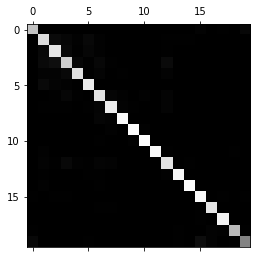

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

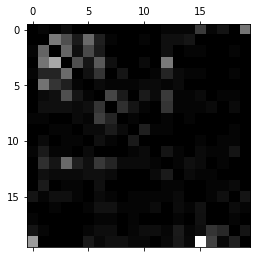

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
label_encoder.classes_

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

## Shortcuts in sklearn - pipelines
Sklearn allows us to build convenient `Pipelines`, which facilitate the management of our data and the training of our models enourmously. Consider for example:

In [ ]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('nb_clf', MultinomialNB())
])

We could even replace the two first lines of the pipeline by using `TfidfVectorizer`, which first fits and transforms the input the same way as the `CountVectorizer`.

In [ ]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('nb_clf', MultinomialNB())])

In [ ]:
scores = cross_val_score(text_clf, X_train, y_train, scoring='accuracy', cv=10)

In [ ]:
scores

array([0.84717314, 0.84452297, 0.85424028, 0.85335689, 0.83289125,
       0.85676393, 0.85499558, 0.8443855 , 0.85676393, 0.85057471])

## Model selection - find your best model
For every model you would like to train, there is a plethora of parameters you could set. How to find the best model? Again, sklearn has a solution: `GridSearchCV`. With grid search cross validation, you can set your hyperparameter space and train different models with all the parameter combinations. Keep in mind that depending on how many folds you train, the whole training procedure takes significantly longer. But let's set up grid search cross validation. We set up a new pipeline for a SVC

In [ ]:
from sklearn.model_selection import GridSearchCV

text_svc = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('svc', LinearSVC())
])

param_grid = {'vect__ngram_range': [(1, 1), (1, 2)],
             'svc__loss': ['hinge', 'squared_hinge'],
             'svc__multi_class': ['ovr', 'crammer_singer']}

gs_svc = GridSearchCV(text_svc, param_grid, cv=5, n_jobs=4, verbose=1)
gs_svc.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed: 28.7min finished
/home/janis/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('svc', LinearSVC())]),
             n_jobs=4,
             param_grid={'svc__loss': ['hinge', 'squared_hinge'],
                         'svc__multi_class': ['ovr', 'crammer_singer'],
                         'vect__ngram_range': [(1, 1), (1, 2)]},
             verbose=1)

from sklearn.model_selection import GridSearchCV

text_svc = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('svc', LinearSVC())
])

param_grid = {'vect__ngram_range': [(1, 1), (1, 2)],
             'svc__loss': ['hinge', 'squared_hinge'],
             'svc__multi_class': ['ovr', 'crammer_singer']}

gs_svc = GridSearchCV(text_svc, param_grid, cv=10, n_jobs=3, verbose=1, return_train_score=True)
gs_svc.fit(X_train, y_train)

In [ ]:
svc_df = pd.DataFrame.from_dict(gs_svc.cv_results_)
svc_df.sort_values(by=["rank_test_score"])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__loss,param_svc__multi_class,param_vect__ngram_range,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,436.592107,171.236469,2.384123,0.070692,hinge,crammer_singer,"(1, 2)","{'svc__loss': 'hinge', 'svc__multi_class': 'cr...",0.933716,0.935484,0.933274,0.925320,0.930592,0.931677,0.003544,1
7,433.028093,113.623423,2.362510,0.188189,squared_hinge,crammer_singer,"(1, 2)","{'svc__loss': 'squared_hinge', 'svc__multi_cla...",0.933716,0.935484,0.933274,0.925320,0.930592,0.931677,0.003544,1
5,35.854953,1.288269,2.438577,0.162266,squared_hinge,ovr,"(1, 2)","{'svc__loss': 'squared_hinge', 'svc__multi_cla...",0.929739,0.931507,0.931065,0.924437,0.930592,0.929468,0.002583,3
1,176.695410,15.243509,2.438571,0.082104,hinge,ovr,"(1, 2)","{'svc__loss': 'hinge', 'svc__multi_class': 'ov...",0.929739,0.932391,0.930623,0.922669,0.929266,0.928938,0.003311,4
4,9.122730,0.169448,1.026385,0.044109,squared_hinge,ovr,"(1, 1)","{'svc__loss': 'squared_hinge', 'svc__multi_cla...",0.926204,0.931507,0.929739,0.922227,0.925729,0.927081,0.003250,5
2,107.631349,46.304807,1.015226,0.028500,hinge,crammer_singer,"(1, 1)","{'svc__loss': 'hinge', 'svc__multi_class': 'cr...",0.925762,0.928414,0.927972,0.920460,0.927940,0.926109,0.002972,6
6,118.908495,45.469967,0.999624,0.033259,squared_hinge,crammer_singer,"(1, 1)","{'svc__loss': 'squared_hinge', 'svc__multi_cla...",0.925762,0.928414,0.927972,0.920460,0.927940,0.926109,0.002972,6
0,23.560421,1.666786,1.010844,0.064981,hinge,ovr,"(1, 1)","{'svc__loss': 'hinge', 'svc__multi_class': 'ov...",0.927088,0.930181,0.926204,0.918250,0.924845,0.925314,0.003943,8


In [ ]:
gs_svc.predict(X_test)

array([18,  8, 12, ...,  2,  6, 13])

In [ ]:
y_test

array([18,  8, 12, ...,  2,  9, 13])

In [ ]:
best_model = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,2))),
    ('tfidf', TfidfTransformer()),
    ('svc', LinearSVC(loss='hinge', multi_class='crammer_singer'))
])

best_model.fit(X_train, y_train)

/home/janis/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('svc', LinearSVC(loss='hinge', multi_class='crammer_singer'))])

In [ ]:
best_model.predict(X_test)

array([18,  8, 12, ...,  2,  6, 13])

In [ ]:
correct = 0

for index, prediction in enumerate(best_model.predict(X_test)):
    if prediction == y_test[index]:
        correct +=1

print('Accuracy: ', correct/y_test.shape[0])

Accuracy:  0.8600637280934679


##  Modern Solutions Sneak Peek - Transformer

Let's look at another task, paraphrase detection. Do two sentences have the same meaning?

In [ ]:
!pip install transformers
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 82.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.4 MB/s eta 0:00:00


In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from datasets import load_dataset
import torch

# 1. Load Pre-trained Model and Tokenizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_name = "AMHR/adversarial-paraphrasing-detector"  # Replace with the model you want to use
model = AutoModelForSequenceClassification.from_pretrained(model_name).to(device)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# 2. Prepare the Dataset
dataset = load_dataset("glue", "mrpc")
eval_dataset = dataset["validation"]

correct = 0
total = 0

# 3. Evaluate the Model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    for i, example in enumerate(eval_dataset):
        if i > 5:
           break
        # Tokenize the inputs and get the model's predictions
        inputs = tokenizer(example['sentence1'], example['sentence2'], return_tensors='pt', truncation=True, padding=True, max_length=128)
        # Move input tensors to the same device as the model
        inputs = {name: tensor.to(device) for name, tensor in inputs.items()}
        outputs = model(**inputs)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)
        # Print first 5 example pairs along with predictions and ground truth labels
        if i < 5:
            print(f"Example {i+1}")
            print(f"Sentence 1: {example['sentence1']}")
            print(f"Sentence 2: {example['sentence2']}")
            print(f"Prediction: {'Paraphrase' if predictions == 1 else 'Not a Paraphrase'}")
            print(f"Ground Truth: {'Paraphrase' if example['label'] == 1 else 'Not a Paraphrase'}")
            print("="*50)


Example 1
Sentence 1: He said the foodservice pie business doesn 't fit the company 's long-term growth strategy .
Sentence 2: " The foodservice pie business does not fit our long-term growth strategy .
Prediction: Paraphrase
Ground Truth: Paraphrase
Example 2
Sentence 1: Magnarelli said Racicot hated the Iraqi regime and looked forward to using his long years of training in the war .
Sentence 2: His wife said he was " 100 percent behind George Bush " and looked forward to using his years of training in the war .
Prediction: Not a Paraphrase
Ground Truth: Not a Paraphrase
Example 3
Sentence 1: The dollar was at 116.92 yen against the yen , flat on the session , and at 1.2891 against the Swiss franc , also flat .
Sentence 2: The dollar was at 116.78 yen JPY = , virtually flat on the session , and at 1.2871 against the Swiss franc CHF = , down 0.1 percent .
Prediction: Not a Paraphrase
Ground Truth: Not a Paraphrase
Example 4
Sentence 1: The AFL-CIO is waiting until October to decide if 

In [ ]:
def predict_paraphrase(sentence1, sentence2, model, tokenizer, device):
    # Prepare the sentences for the model
    inputs = tokenizer(sentence1, sentence2, return_tensors='pt', truncation=True, padding=True, max_length=128)

    # Move the input tensors to the device the model is on
    inputs = {name: tensor.to(device) for name, tensor in inputs.items()}

    model.eval()
    with torch.no_grad():
        # Get model's prediction
        outputs = model(**inputs)
        logits = outputs.logits
        prediction = torch.argmax(logits, dim=-1).item()

    return "Paraphrase" if prediction == 1 else "Not a Paraphrase"

In [ ]:
# Custom Sentences testing
sentence1 = "This tutorial rocks."
sentence2 = "I want to throw rocks at this Tutor."

result = predict_paraphrase(sentence1, sentence2, model, tokenizer, device)
print(f"Sentence 1: {sentence1}")
print(f"Sentence 2: {sentence2}")
print(f"Prediction: {result}")

Sentence 1: This tutorial rocks.
Sentence 2: I want to throw rocks at this Tutor.
Prediction: Not a Paraphrase


In [ ]:
# Custom Sentences Testing
sentence1 = "I am so tired but I want to stay in this tutorial."
sentence2 = "I am exhausted and forced to be here."

result = predict_paraphrase(sentence1, sentence2, model, tokenizer, device)
print(f"Sentence 1: {sentence1}")
print(f"Sentence 2: {sentence2}")
print(f"Prediction: {result}")

Sentence 1: I am so tired but I want to stay in this tutorial.
Sentence 2: I am exhausted and forced to be here.
Prediction: Not a Paraphrase


In [ ]:
# Custom Sentences Testing
sentence1 = "This field of research is pretty cool."
sentence2 = "I find this line of research very cool."

result = predict_paraphrase(sentence1, sentence2, model, tokenizer, device)
print(f"Sentence 1: {sentence1}")
print(f"Sentence 2: {sentence2}")
print(f"Prediction: {result}")

Sentence 1: This field of research is pretty cool.
Sentence 2: I find this line of research very cool.
Prediction: Paraphrase
